## Ford car price prediction using linear regression

In this project we are going to perform Ford car price prediction using linear regression by following steps
1) Data Loading
2) EDA (Exploratory data Analysis)
3) Data cleaning
4) Data processing
5) Splitting the Dataset
6) Model training
7) Model testing
8) Model evaluation

About this Dataset

1.model - > Ford Car Brands
2.year - >Production Year
3.price - >Price of car in $
4.transmission - > Automatic,Manual, Semi-Auto
5.mileage -> Number of miles traveled
6.fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
7.tax -> Annual Tax
8.mpg - > Miles per Gallon
9.engineSize - > Car's Engine Size

In [199]:
## Importing important libraries
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
## Loading the Dataset
df = pd.read_csv("ford.csv")

**EDA**

In [201]:
df.shape ## Dataset has 17966 rows & 9 columns

(17966, 9)

In [202]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Here price is Dependent variable & Other columns will be Independent variables.
Now, we have to select which columns to use in our model by checking correlation of each column with price through EDA.

In [203]:
df.info() ## Checking null values & datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [204]:
df.describe() ## Statistical Analysis of each numeric column

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [205]:
df.isnull().sum().sum() ## There are no null values

np.int64(0)

In [206]:
df.isna().sum().sum() ## There are no na values

np.int64(0)

In [207]:
df.duplicated().sum() ## Dataset has 154 duplicate rows

np.int64(154)

'The distribution of price has outliers on the right side which means\n there are few cars with very price'

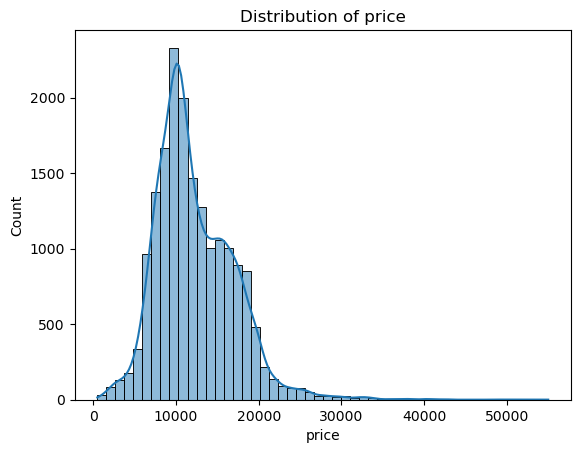

In [208]:
## Checking the Distribution of prices by histogram
sns.histplot(data=df,x="price",bins=50,kde=True)
plt.title("Distribution of price")
'''The distribution of price has outliers on the right side which means
 there are few cars with very price'''

'year,tax,enginesize are positively correlated to price\nwhereas, mileage & mpg are negetively correllated'

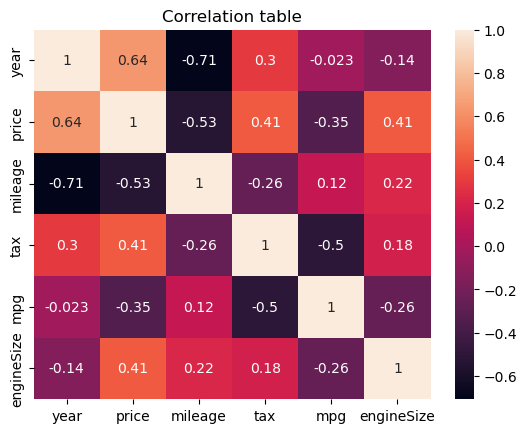

In [209]:
## Plotting the correlation between numerical variable using heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation table")
'''year,tax,enginesize are positively correlated to price
whereas, mileage & mpg are negetively correllated'''


' Here we can see there are entries with year (year of release) \nin 2060 as well which is impractical & should be removed from datset\nYear has high posituve correlation with price & should be used in model'

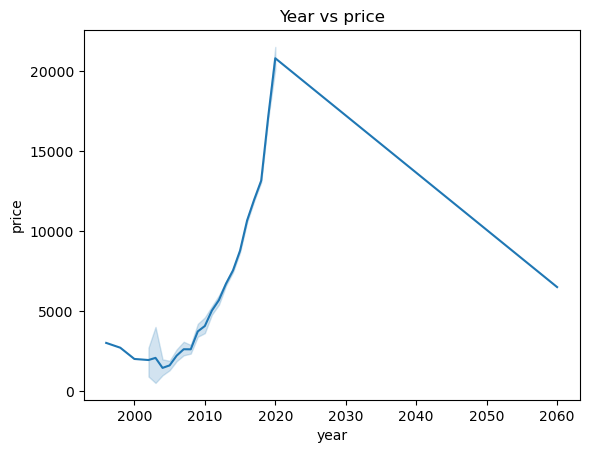

In [210]:
## Checking relation between year & price through line chart
sns.lineplot(x="year",y="price",data=df)
plt.title("Year vs price")
''' Here we can see there are entries with year (year of release) 
in 2060 as well which is impractical & should be removed from datset
Year has high posituve correlation with price & should be used in model'''

'Mileage has clear negetive correlation with price & Should be used in model'

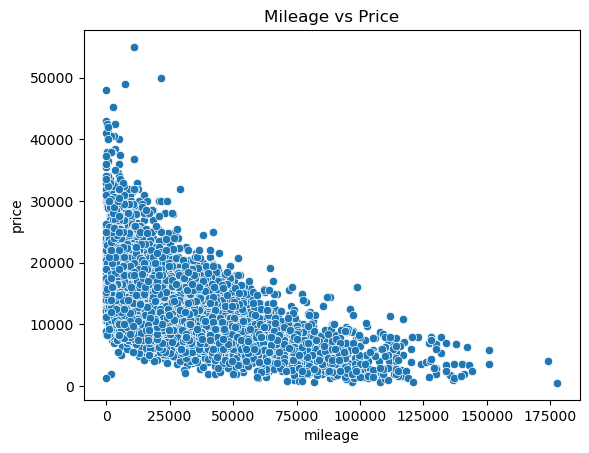

In [211]:
## Checking the relation between mileage & price using scatter plot
sns.scatterplot(data=df,x="mileage",y="price")
plt.title("Mileage vs Price")
'''Mileage has clear negetive correlation with price & Should be used in model'''

'Tax has clear positive correlation with price & Should be used in model'

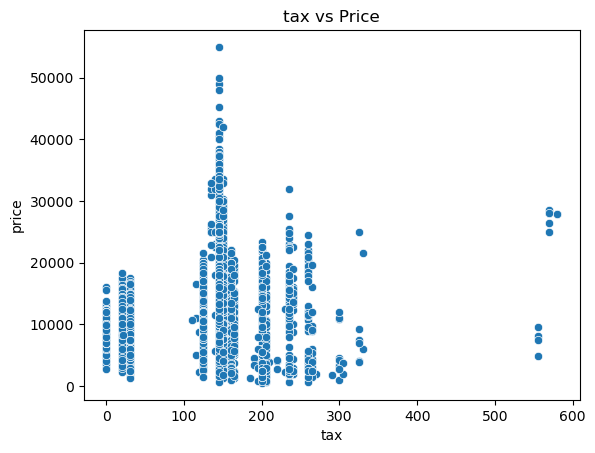

In [212]:
## Checking the relation between tax & price using scatter plot
sns.scatterplot(data=df,x="tax",y="price")
plt.title("tax vs Price")
'''Tax has clear positive correlation with price & Should be used in model'''

'mpg has clear negetive correlation with price & Should be used in model'

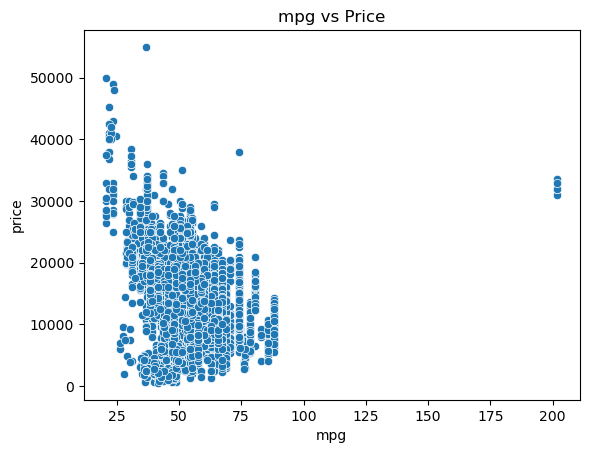

In [213]:
## Checking the relation between mpg & price using scatter plot
sns.scatterplot(data=df,x="mpg",y="price")
plt.title("mpg vs Price")
'''mpg has clear negetive correlation with price & Should be used in model'''

'EngineSize has clear positive correlation with price & Should be used in model'

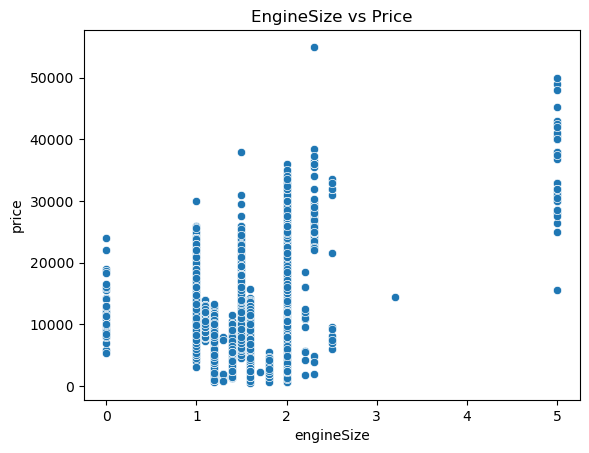

In [214]:
## Checking the relation between engineSize & price using scatter plot
sns.scatterplot(data=df,x="engineSize",y="price")
plt.title("EngineSize vs Price")
'''EngineSize has clear positive correlation with price & Should be used in model'''

Now Let us compare the relation of price with categorical variable

'Some models like Mustang has very high price \nso its better to use the variable in model'

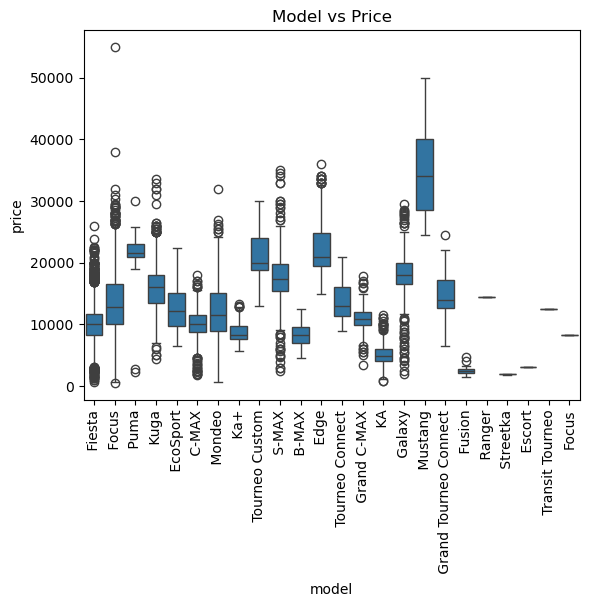

In [215]:
## Checking the relation of model with price
sns.boxplot(data=df,x="model",y="price")
plt.xticks(rotation =90)
plt.title("Model vs Price")
'''Some models like Mustang has very high price 
so its better to use the variable in model'''

'Some Fuel types like Petrol has very high price \nso its better to use the variable in model'

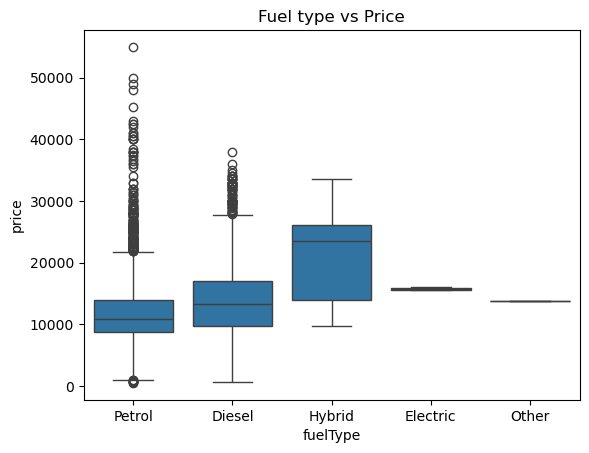

In [216]:
## Checking the relation of Fueltype with price
sns.boxplot(data=df,x="fuelType",y="price")
plt.title("Fuel type vs Price")
'''Some Fuel types like Petrol has very high price 
so its better to use the variable in model'''

' There iss no much relation beetween the transmission & price\nso this variable can be dropped'

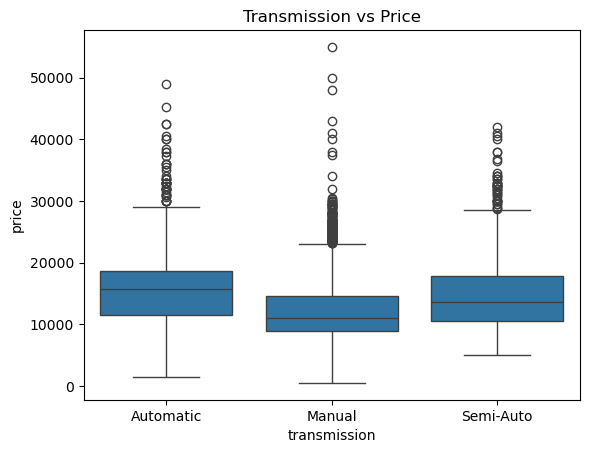

In [217]:
## Checking the relation of transmission with price
sns.boxplot(data=df,x="transmission",y="price")
plt.title("Transmission vs Price")
''' There iss no much relation beetween the transmission & price
so this variable can be dropped'''

**Data  Cleaning & processing**

In [218]:
## Dropping duplicate records
df.drop_duplicates(inplace=True)

In [219]:
##Dropping the record with year as 2060 from the dataset
data = df[df["year"]!=2060]

In [220]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [221]:
## Defining X & y variables for model
X = data.drop(columns=["price","transmission"])
y = data["price"]

Now we are going to perform encoding on categorical variable & Standardisation of numerical variable in X

In [222]:
## Creating X version with hot one encoding
X_hot_one = pd.get_dummies(data=X,columns=["model","fuelType"])

In [223]:
X_hot_one = X_hot_one.astype(int)

In [224]:
X_hot_one

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17962,2014,40700,30,57,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
X_hot_one[numerical_cols] = scaler.fit_transform(X_hot_one[numerical_cols])

In [227]:
X_hot_one

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.069100,-0.382920,0.591483,-0.042378,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.562581,-0.736260,0.591483,-0.042378,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.069100,-0.562551,0.591483,-0.042378,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.056062,-0.665344,0.510877,-1.720342,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.056062,-1.127709,0.510877,-0.930712,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.069100,-0.343986,0.591483,-1.029415,-0.446973,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17962,-1.411343,0.892007,-1.343040,-0.042378,-0.446973,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17963,-0.917862,-0.843019,-1.504251,0.944660,-0.446973,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17964,0.562581,-0.946172,0.510877,-0.042378,-0.446973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [228]:
## Creating X version with Label encoding
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'fuelType']

Xlable = X.copy()  # make a safe copy
label_encoders = {}

for col in columns:
    le = LabelEncoder()
    Xlable[col] = le.fit_transform(Xlable[col].astype(str))  # Convert to string in case of nulls
    label_encoders[col] = le


In [229]:
Xlable

,model,year,mileage,fuelType,tax,mpg,engineSize
0,5,2017,15944,4,150,57.7,1.0
1,6,2018,9083,4,150,57.7,1.0
2,6,2017,12456,4,150,57.7,1.0
3,5,2019,10460,4,145,40.3,1.5
4,5,2019,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...
17961,0,2017,16700,4,150,47.1,1.4
17962,0,2014,40700,4,30,57.7,1.0
17963,6,2015,7010,0,20,67.3,1.6
17964,11,2018,5007,4,145,57.7,1.2


In [230]:
Xlable[numerical_cols] = scaler.fit_transform(Xlable[numerical_cols])

In [231]:
Xlable

,model,year,mileage,fuelType,tax,mpg,engineSize
0,5,0.069100,-0.382920,4,0.591483,-0.020681,-0.810532
1,6,0.562581,-0.736260,4,0.591483,-0.020681,-0.810532
2,6,0.069100,-0.562551,4,0.591483,-0.020681,-0.810532
3,5,1.056062,-0.665344,4,0.510877,-1.738002,0.345322
4,5,1.056062,-1.127709,4,0.510877,-0.908951,-0.810532
...,...,...,...,...,...,...,...
17961,0,0.069100,-0.343986,4,0.591483,-1.066865,0.114151
17962,0,-1.411343,0.892007,4,-1.343040,-0.020681,-0.810532
17963,6,-0.917862,-0.843019,0,-1.504251,0.926806,0.576493
17964,11,0.562581,-0.946172,4,0.510877,-0.020681,-0.348190


In [232]:
## Importing important modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Splitting the data into Train & test data**

In [233]:
X_train,X_test,y_train,y_test = \
train_test_split(X_hot_one,y,test_size=20,random_state=42)

**Model training**

In [234]:
model = LinearRegression()

In [235]:
model.fit(X_train,y_train)

LinearRegression()

**Model testing**

In [236]:
y_pred = model.predict(X_test)

In [237]:
y_pred

array([17255.8291468 ,  -258.90153969, 15822.83122526, 16122.86655283,
       13214.33020384,  7048.56930921,  8123.58768652, 21173.34691016,
       10028.78941924, 12673.46656022,  9818.80385982,  8326.57555118,
       14001.43870078, 13394.62752121, 11262.32902156, 11342.00820294,
       13983.66323611,  9970.40532827, 20608.46891876, -1549.87156206])

In [238]:
y_test

1034     14995
16978     2295
2864     14950
11569    17890
10089    11795
11049     8263
15446     8000
2314     20500
17894    10999
13953    15000
9067      9995
15144     7800
8948     16500
17555    13500
8702     10000
3684      7850
14848    14999
3477      9200
10585    23179
16278     3295
Name: price, dtype: int64

**Model Evaluation**

In [239]:
r2 = r2_score(y_test,y_pred)
r2

0.8562273030053025

In [240]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 1.18211208285995


Now, Conducting model training, testing & evaluation with data with Label encoding

In [241]:
X_train,X_test,y_train,y_test = \
train_test_split(Xlable,y,test_size=20,random_state=42)

In [242]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [243]:
y_pred = model2.predict(X_test)
y_pred

array([14693.18196576, -1839.36254128, 15852.54453998, 16363.83844554,
       11409.55501502,  6534.9917188 ,  7799.25074846, 21681.35225796,
       11619.97196514, 12514.85508919,  9320.29965613,  7981.38354938,
       12110.55889048, 13665.13001164, 11366.75900015, 12182.34904331,
       14005.54529017,  9812.09574047, 18812.69429352,  -919.47645557])

In [244]:
y_test

1034     14995
16978     2295
2864     14950
11569    17890
10089    11795
11049     8263
15446     8000
2314     20500
17894    10999
13953    15000
9067      9995
15144     7800
8948     16500
17555    13500
8702     10000
3684      7850
14848    14999
3477      9200
10585    23179
16278     3295
Name: price, dtype: int64

In [245]:
r2 = r2_score(y_test,y_pred)
r2

0.7968195008602432

In [246]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.6782975430287184


**Conclusion**

R2 & Adjusted R2 with one hot encode data = R2 Score-0.86,Adjusted R² Score: 1.82
R2 & Adjusted R2 with label encode data = R2 Score-0.80,Adjusted R² Score: 0.67

Model gives better results with one hot encoding

## Thank you